In [1]:
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_file
import pandas as pd
import numpy as np
# import matplotlib. as plt


In [2]:
df = pd.read_csv('https://www.saude.pr.gov.br/sites/default/arquivos_restritos/files/documento/2021-05/informe_epidemiologico_20_05_2021_geral.csv', sep=';')
# df_casos = pd.read_csv('https://www.saude.pr.gov.br/sites/default/arquivos_restritos/files/documento/2021-03/informe_epidemiologico_18_03_2021_obitos_casos_municipio.csv', sep=';')   ##Boletim diário
df.head()

,IBGE_RES_PR,IBGE_ATEND_PR,SEXO,IDADE_ORIGINAL,MUN_RESIDENCIA,MUN_ATENDIMENTO,LABORATORIO,DATA_DIAGNOSTICO,DATA_CONFIRMACAO_DIVULGACAO,DATA_INICIO_SINTOMAS,OBITO,DATA_OBITO,DATA_OBITO_DIVULGACAO,STATUS,DATA_RECUPERADO_DIVULGACAO,FONTE_DADO_RECUPERADO
0,4115606,4115606,M,60,MATELANDIA,MATELANDIA,Teste Rápido Antígeno (Imunocromatografia),2021-05-14,2021-05-19,2021-05-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,4106902,4106902,M,59,CURITIBA,CURITIBA,"COVID-19, Biologia Molecular",2021-05-17,2021-05-19,2021-05-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2,4106902,4106902,M,54,CURITIBA,CURITIBA,"COVID-19, Biologia Molecular",2021-05-18,2021-05-19,2021-05-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
3,4118501,4118501,M,33,PATO BRANCO,PATO BRANCO,"COVID-19, Biologia Molecular",2021-05-13,2021-05-19,2021-05-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,4106902,4106902,M,23,CURITIBA,CURITIBA,"COVID-19, Biologia Molecular",2021-05-19,2021-05-19,2021-05-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_pien = df[df['MUN_RESIDENCIA'] == 'PIEN']
# df_pien.info()
df_pien.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 1107 to 1046851
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   IBGE_RES_PR                  1102 non-null   int64 
 1   IBGE_ATEND_PR                1102 non-null   int64 
 2   SEXO                         1102 non-null   object
 3   IDADE_ORIGINAL               1102 non-null   int64 
 4   MUN_RESIDENCIA               1102 non-null   object
 5   MUN_ATENDIMENTO              875 non-null    object
 6   LABORATORIO                  1102 non-null   object
 7   DATA_DIAGNOSTICO             1102 non-null   object
 8   DATA_CONFIRMACAO_DIVULGACAO  1102 non-null   object
 9   DATA_INICIO_SINTOMAS         1060 non-null   object
 10  OBITO                        904 non-null    object
 11  DATA_OBITO                   14 non-null     object
 12  DATA_OBITO_DIVULGACAO        14 non-null     object
 13  STATUS                     

In [11]:
pwd

'/home/patriky/Development/covid-pien'

In [4]:
df_pien.to_csv('maio/covid_pien_20_05_2021.csv', sep=';', index=False)

In [6]:
df_pien[df_pien.isna().any(axis=1)]

,IBGE_RES_PR,IBGE_ATEND_PR,SEXO,IDADE_ORIGINAL,MUN_RESIDENCIA,MUN_ATENDIMENTO,LABORATORIO,DATA_DIAGNOSTICO,DATA_CONFIRMACAO_DIVULGACAO,DATA_INICIO_SINTOMAS,OBITO,DATA_OBITO,DATA_OBITO_DIVULGACAO,STATUS,DATA_RECUPERADO_DIVULGACAO,FONTE_DADO_RECUPERADO
4967,4119103,4119152,M,27,PIEN,PINHAIS,Não informado,04/03/2021,10/03/2021,01/03/2021,Não,NaN,NaN,Recuperado,11/03/2021,Notifica COVID-19
5582,4119103,4119103,M,28,PIEN,PIEN,Teste Rápido Antígeno (Imunocromatografia),09/03/2021,10/03/2021,05/03/2021,Não,NaN,NaN,Recuperado,17/03/2021,Notifica COVID-19
6313,4119103,4119103,M,32,PIEN,PIEN,"COVID-19, Biologia Molecular",09/03/2021,10/03/2021,01/03/2021,NaN,NaN,NaN,NaN,NaN,NaN
8249,4119103,4119103,M,50,PIEN,PIEN,"COVID-19, Biologia Molecular",05/03/2021,10/03/2021,04/03/2021,Não,NaN,NaN,Recuperado,16/03/2021,Notifica COVID-19
9536,4119103,4119103,F,39,PIEN,PIEN,Teste Rápido Antígeno (Imunocromatografia),09/03/2021,10/03/2021,03/03/2021,Não,NaN,NaN,Recuperado,16/03/2021,Notifica COVID-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777017,4119103,4119103,F,34,PIEN,PIEN,"COVID-19, Biologia Molecular",12/03/2021,13/03/2021,25/02/2021,Não,NaN,NaN,Recuperado,13/03/2021,Notifica COVID-19
778834,4119103,4119103,F,70,PIEN,PIEN,Vírus Respiratório,11/03/2021,13/03/2021,04/03/2021,NaN,NaN,NaN,NaN,NaN,NaN
778843,4119103,4119103,F,62,PIEN,PIEN,"COVID-19, Biologia Molecular",12/03/2021,13/03/2021,05/03/2021,Não,NaN,NaN,Recuperado,16/03/2021,Notifica COVID-19
781254,4119103,4119103,F,50,PIEN,PIEN,"COVID-19, Biologia Molecular",17/03/2021,18/03/2021,10/03/2021,NaN,NaN,NaN,NaN,NaN,NaN


# Tratando os dados Nulos e datas

In [8]:
# Preenchendo valores NaN
df_pien['MUN_ATENDIMENTO'] = df_pien['MUN_ATENDIMENTO'].fillna("Não informado")
df_pien['OBITO'] = df_pien['OBITO'].fillna("Não informado")
df_pien['STATUS'] = df_pien['STATUS'].fillna("Não informado")
df_pien['FONTE_DADO_RECUPERADO'] = df_pien['FONTE_DADO_RECUPERADO'].fillna("Não informado")


# Alterando os campos do tipo datetime
df_pien['DATA_DIAGNOSTICO'] = pd.to_datetime(df_pien['DATA_DIAGNOSTICO'], format='%Y%m%d')
df_pien['DATA_CONFIRMACAO_DIVULGACAO'] = pd.to_datetime(df_pien['DATA_CONFIRMACAO_DIVULGACAO'], format='%Y%m%d')
df_pien['DATA_INICIO_SINTOMAS'] = pd.to_datetime(df_pien['DATA_INICIO_SINTOMAS'], format='%Y%m%d')
df_pien['DATA_OBITO'] = pd.to_datetime(df_pien['DATA_OBITO'], format='%Y%m%d')
df_pien['DATA_OBITO_DIVULGACAO'] = pd.to_datetime(df_pien['DATA_OBITO_DIVULGACAO'], format='%Y%m%d')
df_pien['DATA_RECUPERADO_DIVULGACAO'] = pd.to_datetime(df_pien['DATA_RECUPERADO_DIVULGACAO'], format='%Y%m%d')


<ipython-input-8-e6549391bf5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pien['MUN_ATENDIMENTO'] = df_pien['MUN_ATENDIMENTO'].fillna("Não informado")
<ipython-input-8-e6549391bf5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pien['OBITO'] = df_pien['OBITO'].fillna("Não informado")
<ipython-input-8-e6549391bf5d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

ValueError: time data '04/03/2021' does not match format '%Y%m%d' (match)

In [102]:
# Verifica a quantidade de nan em cada coluna
df_pien.isnull().sum()

IBGE_RES_PR                      0
IBGE_ATEND_PR                    0
SEXO                             0
IDADE_ORIGINAL                   0
MUN_RESIDENCIA                   0
MUN_ATENDIMENTO                  0
LABORATORIO                      0
DATA_DIAGNOSTICO                 0
DATA_CONFIRMACAO_DIVULGACAO      0
DATA_INICIO_SINTOMAS            33
OBITO                            0
DATA_OBITO                     605
DATA_OBITO_DIVULGACAO          605
STATUS                           0
DATA_RECUPERADO_DIVULGACAO      98
FONTE_DADO_RECUPERADO            0
dtype: int64

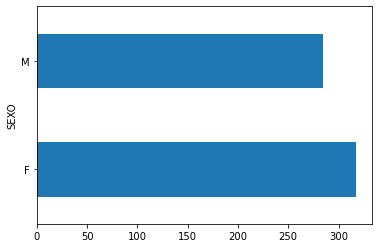

In [15]:
df_pien['SEXO'].groupby(df_pien.SEXO).count().plot.barh()

In [65]:
# df_pien['ANO'] = df_pien['DATA_CONFIRMACAO_DIVULGACAO'].dt.year
# df_pien['MES'] = df_pien['DATA_CONFIRMACAO_DIVULGACAO'].dt.month
df_pien['MES_ANO'] = df_pien['DATA_CONFIRMACAO_DIVULGACAO'].dt.to_period('M')

<ipython-input-65-3f09546c227c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pien['MES_ANO'] = df_pien['DATA_CONFIRMACAO_DIVULGACAO'].dt.to_period('M')


In [69]:
pien_2021 = df_pien[df_pien['ANO'] == 2021]
pien_2021.head()

,IBGE_RES_PR,IBGE_ATEND_PR,SEXO,IDADE_ORIGINAL,MUN_RESIDENCIA,MUN_ATENDIMENTO,LABORATORIO,DATA_DIAGNOSTICO,DATA_CONFIRMACAO_DIVULGACAO,DATA_INICIO_SINTOMAS,OBITO,DATA_OBITO,DATA_OBITO_DIVULGACAO,STATUS,DATA_RECUPERADO_DIVULGACAO,FONTE_DADO_RECUPERADO,ANO,MES,MES_ANO
5582,4119103,4119103,M,28,PIEN,PIEN,Teste Rápido Antígeno (Imunocromatografia),2021-09-03,2021-10-03,2021-05-03,Não,NaT,NaT,Recuperado,2021-03-17,Notifica COVID-19,2021,10,2021-10
6313,4119103,4119103,M,32,PIEN,PIEN,"COVID-19, Biologia Molecular",2021-09-03,2021-10-03,2021-01-03,NaN,NaT,NaT,NaN,NaT,NaN,2021,10,2021-10
8249,4119103,4119103,M,50,PIEN,PIEN,"COVID-19, Biologia Molecular",2021-05-03,2021-10-03,2021-04-03,Não,NaT,NaT,Recuperado,2021-03-16,Notifica COVID-19,2021,10,2021-10
9536,4119103,4119103,F,39,PIEN,PIEN,Teste Rápido Antígeno (Imunocromatografia),2021-09-03,2021-10-03,2021-03-03,Não,NaT,NaT,Recuperado,2021-03-16,Notifica COVID-19,2021,10,2021-10
9839,4119103,4119103,M,31,PIEN,PIEN,"COVID-19, Biologia Molecular",2021-04-03,2021-10-03,2021-03-03,Não,NaT,NaT,Recuperado,2021-03-18,Notifica COVID-19,2021,10,2021-10


In [1]:
pien_2021.head()

NameError: name 'pien_2021' is not defined